In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
#Method 1 - cube 
def mc_cube(d, num_samples):
    hit=0
    for i in range(num_samples):
        sample_cube=np.random.uniform(-0.5,0.5,d)
        if np.linalg.norm(sample_cube)<=1: #inside ball 
            hit+=1
    return (hit/num_samples)

In [3]:
#Method 2 - ball. Uses Muller, Marsaglia method 
def mc_ball(d, num_samples):
    vol = math.pi**(d/2)/(math.gamma(d/2)* d/2)
    hit=0
    for i in range(num_samples): 
        gaussians = np.random.normal(0,1,d) #vector of gaussians
        norm=np.linalg.norm(gaussians) #divide by the norm 
        radius = np.random.uniform(0,1)**(1/d) #sample radius
        sample_ball= (gaussians/norm) * radius  
        if np.any((sample_ball < -0.5)|(sample_ball > 0.5)): 
            pass
        else: #inside cube  
            hit += 1
    return (hit*vol/num_samples)


In [4]:
#Simulate both methods and print the volume of the intersection 
num_samples=1000000 #1e6
for d in [5,10,15,20]:
    print(d,'cube: ', mc_cube(d,num_samples))
    print(d,'ball: ', mc_ball(d,num_samples)) 
    print('---------------')


5 cube:  0.999577
5 ball:  0.9984776104713803
---------------
10 cube:  0.762653
10 ball:  0.763480861078679
---------------
15 cube:  0.19657
15 ball:  0.19712912464292207
---------------
20 cube:  0.018395
20 ball:  0.01822289118277367
---------------


In [5]:
'''
num_samples=10000000 #1e7
runtime: 18min
5 cube:  0.9995701
5 ball:  0.9998177711543228
---------------
10 cube:  0.7626474
10 ball:  0.7621116780056688
---------------
15 cube:  0.1974903
15 ball:  0.1972704875227952
---------------
20 cube:  0.0182378
20 ball:  0.018244119931631095
'''

'\nnum_samples=10000000 #1e7\nruntime: 18min\n5 cube:  0.9995701\n5 ball:  0.9998177711543228\n---------------\n10 cube:  0.7626474\n10 ball:  0.7621116780056688\n---------------\n15 cube:  0.1974903\n15 ball:  0.1972704875227952\n---------------\n20 cube:  0.0182378\n20 ball:  0.018244119931631095\n'

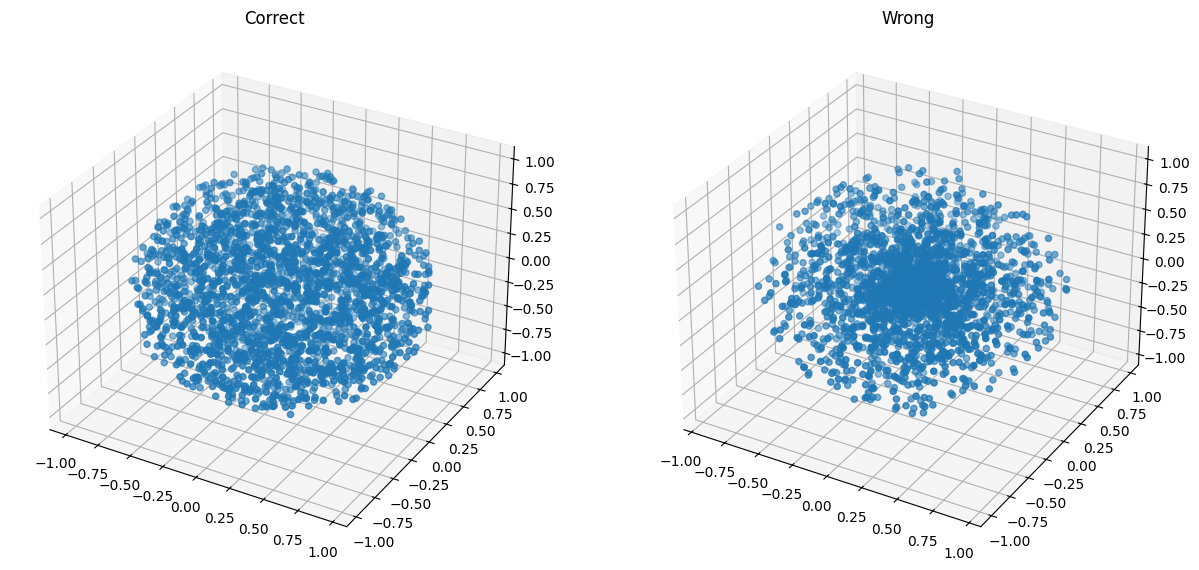

In [6]:
#Extra - problem with sampling radius naively 
def mc_ball_right(d, num_samples):
    vol = math.pi**(d/2)/(math.gamma(d/2)* d/2)
    hit=0
    for i in range(num_samples): 
        gaussians = np.random.normal(0,1,d) 
        norm=np.linalg.norm(gaussians)
        radius = np.random.uniform(0,1)**(1/d) #correct radius
        sample_ball= (gaussians/norm) * radius
        if np.any((sample_ball < -0.5)|(sample_ball > 0.5)): 
            pass
        else:
            hit += 1
        samples_ball_right[i]=sample_ball
    return (hit*vol/num_samples)

def mc_ball_wrong(d, num_samples):
    vol = math.pi**(d/2)/(math.gamma(d/2)* d/2)
    hit=0
    for i in range(num_samples): 
        gaussians = np.random.normal(0,1,d) 
        norm=np.linalg.norm(gaussians)
        radius = np.random.uniform(0,1) #wrong radius
        sample_ball= (gaussians/norm) * radius
        if np.any((sample_ball < -0.5)|(sample_ball > 0.5)):
            pass
        else:
            hit += 1
        samples_ball_wrong[i]=sample_ball
    return (hit*vol/num_samples)

ns=2500
samples_ball_right=np.zeros((ns,3))
samples_ball_wrong = np.zeros((ns,3))
mc_ball_right(3,ns)
mc_ball_wrong(3,ns)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), subplot_kw={'projection': '3d'})

ax1.set_title('Correct')
ax2.set_title('Wrong')
ax1.scatter(*samples_ball_right.T)
ax2.scatter(*samples_ball_wrong.T)
plt.show()



In [7]:
#Extra - problem with rejection sampling in high dimensions
def mc_ball_rejection(d, tries):
    vol = math.pi**(d/2)/math.gamma(d/2)* d/2

    num_samples=0
    samples_ball=np.zeros((num_samples,d))
    hit=0
    for i in range(tries): #todo max samples tries
        sample_ball=np.random.uniform(-1,1,d)
        if np.linalg.norm(sample_ball)<=1: 
            num_samples+=1 #rejection sampling passed
            # samples_ball[i]=sample_ball
            if np.any((sample_ball < -0.5)|(sample_ball > 0.5)): #outside cube
                pass
            else:
                hit += 1
    print(f'{d} dimensions')
    print('accepted =', num_samples)   
    print('rejected =', tries-num_samples)
    # return (hit*vol/num_samples)

mc_ball_rejection(15,1000000)


15 dimensions
accepted = 13
rejected = 999987
